In [1]:
import torch
# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 2.0.1+cu117 CPU


In [36]:
from IPython.display import Image, clear_output  # to display images
import pandas as pd
import random
import os
from shutil import copyfile
import cv2
from pathlib import Path
import torchvision


In [18]:
#train your custom YoloV5 model
# img 640 - resize the images to 640x640 pixels
# batch 4 - 4 images per batch
# epochs 30 - train for 30 epochs
# data ./data/clothing.yaml - path to dataset config
# cfg ./models/yolov5x.yaml - model config
# weights yolov5x.pt - use pre-trained weights from the YOLOv5x model
# name yolov5x_clothing - name of our model
# cache - cache dataset images for faster training
%cd ./yolov5
!python train.py --img 416 --batch 16 --epochs 10 --data '../data/data.yaml'  --cfg '../data/custom_yolov5s.yaml' --weights '' --name joos --nosave --cache
%cd ..

/mnt/archive/work/CSG/yolo-tutorial/yolov5
train: weights=, cfg=../data/custom_yolov5s.yaml, data=../data/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=416, rect=False, resume=False, nosave=True, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=joos, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-218-g9e97ac3 Python-3.11.5 torch-2.0.1+cu117 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=

In [19]:
# use you weigths in the detection
%cd ./yolov5
!python detect.py --source ../data/test/images --weights 'runs/train/joos7/weights/last.pt' --img 416 --conf 0.2 --save-txt
%cd ..

/mnt/archive/work/CSG/yolo-tutorial/yolov5
detect: weights=['runs/train/joos7/weights/last.pt'], source=../data/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.2, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-218-g9e97ac3 Python-3.11.5 torch-2.0.1+cu117 CPU

Fusing layers... 
custom_YOLOv5s summary: 166 layers, 7086274 parameters, 0 gradients
image 1/29 /mnt/archive/work/CSG/yolo-tutorial/data/test/images/0b47311f426ff926578c9d738d683e76_jpg.rf.40183eae584a653181bbd795ba3c353f.jpg: 416x416 (no detections), 42.7ms
image 2/29 /mnt/archive/work/CSG/yolo-tutorial/data/test/images/1c0060ef868bdc326ce5e6389cb6732f_jpg.rf.f02cd668d26a53d9bf001497992b3657.jpg: 

In [38]:
import matplotlib.pyplot as plt
from matplotlib import rc
def load_image(img_path: Path, resize=True):
  img = cv2.cvtColor(cv2.imread(str(img_path)), cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (128, 256), interpolation = cv2.INTER_AREA)
  return img
def show_grid(image_paths):
  images = [load_image(img) for img in image_paths]
  images = torch.as_tensor(images)
  images = images.permute(0, 3, 1, 2)
  grid_img = torchvision.utils.make_grid(images, nrow=11)
  plt.figure(figsize=(24, 12))
  plt.imshow(grid_img.permute(1, 2, 0))
  plt.axis('off');

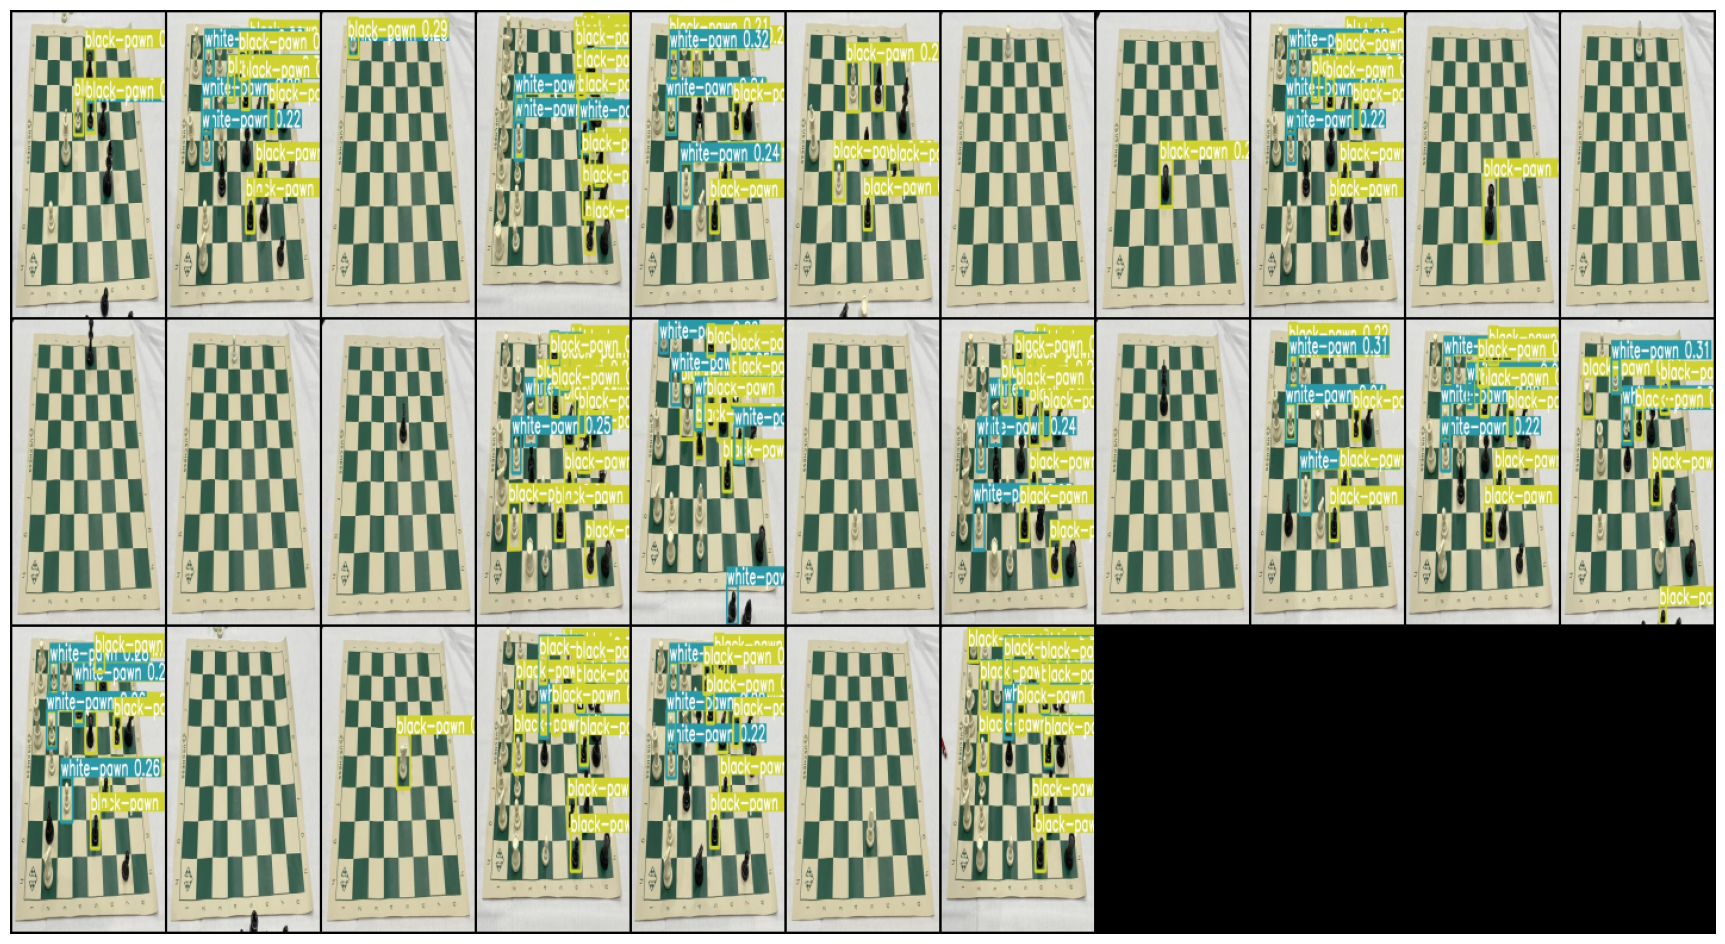

In [39]:
img_paths = list(Path("yolov5/runs/detect/exp6").glob("*.jpg"))
show_grid(img_paths)